# Demonstrate Nucleosome Clustering with the Sliding Nucleosome Model

Simulation of the sliding nucleosome model with the following parameters:

- Number of marks: 1
- Correlation in methylation pattern: FALSE
- Maximum number of binders per mark: 2

#### Specify Package Root Directory

In [1]:
import os
import sys

# Get the absolute path of the notebook's directory
notebook_directory = os.path.dirname(os.path.abspath('__file__'))

# Navigate one level up to get the root directory path
root_directory = os.path.abspath(os.path.join(notebook_directory, '..'))

# Change the working directory to the root directory
os.chdir(root_directory)

# Append the root directory to sys.path
sys.path.append(root_directory)

#### Import Modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sliding_nucleosome.nucleo_arr as nuc
from sliding_nucleosome import mc

#### Initialize Physical Parameters

In [3]:
# Specify physical parameters
J = np.atleast_2d([-3.92])
B = np.atleast_2d([-1.5])
mu = np.array([9.1])

# Generate a methylation sequence
n_beads = 1000
frac_methyl = 0.2
p_methyl_states = [
    (1 - frac_methyl) ** 2,
    2 * frac_methyl * (1 - frac_methyl),
    frac_methyl ** 2
]
marks = np.random.choice([0, 1, 2], n_beads, p_methyl_states)
marks = np.atleast_2d(marks).T

# Specify the polymer
gamma = np.ones(marks.shape[0])
nbi = np.array([2])
linker_corr_length = 35
linker_lengths = np.ones(marks.shape[0])
a = int(np.floor(6.1))
lam = -np.log(1 - 1 / linker_corr_length)

#### Initialize the Nucleosome Array

In [4]:
nuc_arr = nuc.NucleosomeArray(
    J = J,
    B = B,
    mu = mu,
    linker_lengths = linker_lengths,
    a = a,
    lam = lam,
    marks = marks,
    Nbi = nbi
)

#### Specify Simulation Parameters

In [5]:
out_dir = "output"
n_steps = 5000
n_save = 1

#### Run the Simulation

In [6]:
mc.mc_linkers(nuc_arr, n_save, n_steps, out_dir)

#### Inspect Configuration

In [7]:
# Extract the linker length distribution
linker_lengths = nuc_arr.linker_lengths

# Print the linker lengths
print("Linker Lengths:")
print(linker_lengths)

Linker Lengths:
[4. 2. 2. 3. 1. 1. 2. 4. 2. 2. 1. 4. 5. 4. 2. 3. 1. 5. 4. 5. 5. 4. 3. 5.
 3. 4. 2. 1. 1. 2. 4. 2. 3. 5. 4. 4. 5. 1. 4. 3. 5. 5. 4. 3. 5. 2. 3. 3.
 5. 2. 5. 5. 3. 1. 5. 3. 3. 3. 1. 2. 4. 1. 2. 1. 3. 3. 2. 4. 4. 1. 3. 2.
 5. 4. 1. 5. 3. 4. 3. 5. 2. 2. 3. 5. 3. 5. 5. 5. 5. 1. 3. 2. 1. 1. 1. 2.
 3. 4. 1. 1. 4. 5. 1. 4. 1. 4. 4. 5. 5. 4. 5. 5. 4. 5. 3. 2. 5. 1. 1. 5.
 2. 2. 5. 2. 3. 1. 1. 1. 4. 5. 3. 3. 3. 2. 3. 5. 4. 1. 2. 1. 4. 1. 3. 1.
 3. 4. 1. 5. 2. 1. 3. 2. 2. 1. 2. 3. 4. 4. 3. 2. 3. 2. 2. 1. 5. 2. 1. 1.
 1. 1. 4. 5. 1. 4. 4. 1. 4. 2. 1. 3. 4. 2. 5. 1. 1. 2. 1. 5. 5. 3. 5. 5.
 2. 5. 4. 1. 1. 4. 5. 1. 3. 2. 4. 1. 2. 4. 4. 3. 1. 4. 1. 1. 1. 2. 5. 5.
 3. 2. 1. 1. 1. 2. 4. 3. 3. 3. 1. 5. 2. 2. 3. 4. 2. 1. 5. 5. 3. 5. 2. 3.
 5. 3. 5. 1. 2. 2. 4. 2. 4. 5. 2. 2. 4. 1. 1. 4. 2. 4. 5. 4. 5. 3. 4. 1.
 5. 1. 3. 5. 3. 5. 3. 2. 5. 3. 4. 2. 3. 1. 5. 3. 5. 3. 5. 3. 5. 5. 2. 3.
 4. 3. 5. 4. 2. 5. 3. 3. 4. 3. 5. 4. 2. 2. 1. 2. 5. 5. 2. 2. 3. 4. 4. 4.
 3. 4. 1. 4. 5. 4. 2. 5. 5. 1. 1. 1

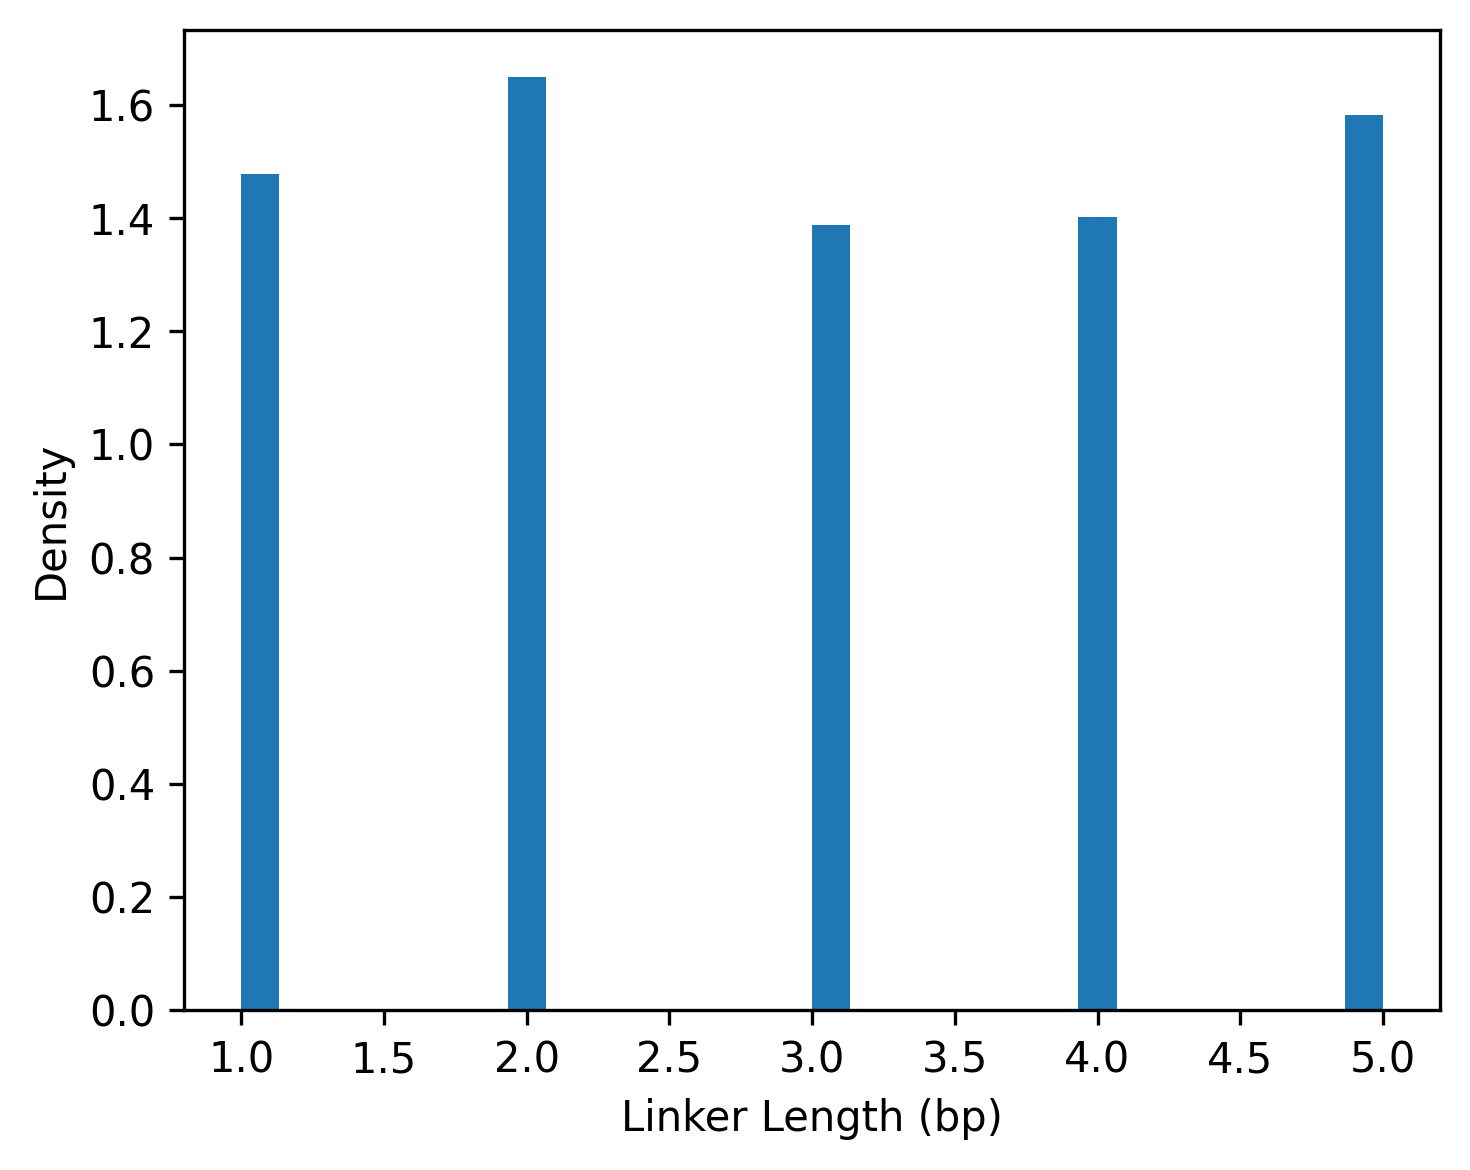

In [8]:
# Plot the linker length distribution
nbins = 30
plt.figure(figsize=(5,4), dpi=300)
plt.hist(linker_lengths, bins=nbins, density=True)
plt.xlabel("Linker Length (bp)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()